## Euler-Lagrange equation

For a simple pendulum, the Lagrangian with generalized coordinate $\phi$ is

$\begin{align}
  \mathcal{L} = \frac12 m L^2 \dot\phi^2 - mgL(1 - \cos\phi)
\end{align}$

The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi} = \frac{\partial\mathcal L}{\partial\phi}
 \quad\Longrightarrow\quad
 m L^2 \ddot \phi = -mgL\sin\phi
  \ \mbox{or}\ \ddot\phi = - \omega_0^2\sin\phi = 0
  \;.
\end{align}$

## Hamilton's equations

The generalized momentum corresponding to $\phi$ is

$\begin{align}
   \frac{\partial\mathcal{L}}{\partial \dot\phi} = m L^2 \dot\phi \equiv p_\phi
   \;.
\end{align}$

We can invert this equation to find $\dot\phi = p_\phi / m L^2$.
Constructing the Hamiltonian by Legendre transformation we find 

$\begin{align}
  \mathcal{H} &= \dot\phi p_\phi  - \mathcal{L} \\
              &= \frac{p_\phi^2}{m L^2} - \frac12 m L^2 \dot\phi^2 + mgL(1 - \cos\phi) \\
              &= \frac{p_\phi^2}{2 m L^2} + mgL(1 - \cos\phi)
              \;.
\end{align}$

Thus $\mathcal{H}$ is simply $T + V$.  Hamilton's equations are

$\begin{align}
  \dot\phi &= \frac{\partial\mathcal{H}}{\partial p_\phi} = \frac{p_\phi}{m L^2} \\
  \dot p_\phi &= -\frac{\partial\mathcal{H}}{\partial \phi} = -mgL \sin\phi 
  \;.
\end{align}$

## Double Pendulum
The cartesian coordinates for a double pendulum system are defined by the angle of each pendulum from the y-axis as:

$\begin{align}
   x_1 = l_1 sin(\phi_1)
\end{align}$

$\begin{align}
   y_1 = -l_1 cos(\phi_1)
\end{align}$

$\begin{align}
   x_2 = l_1 sin(\phi_1) + l_2 sin(\phi_2)
\end{align}$

$\begin{align}
   y_2 = -l_1 cos(\phi_1) - l_2 cos(\phi_2)
\end{align}$

Potential and Kinetic energy are:

$\begin{align}
   U = -(m_1+m_2)gl_1cos(\phi_1) - m_2gl_2cos(\phi_2)
\end{align}$

$\begin{align}
   T = \frac{1}{2}m_1l_1^2\dot\phi^2 + \frac{1}{2}m_2[l_1^2\dot\phi_1^2+l_2^2\dot\phi_2^2 + 2l_1l_2\dot\phi_1\dot\phi_2cos(\phi_1-\phi_2)
\end{align}$

The Hamiltonian is:

$\begin{align}
   H = T + U = \frac{1}{2}m_1l_1^2\dot\phi^2 + \frac{1}{2}m_2[l_1^2\dot\phi_1^2+l_2^2\dot\phi_2^2 + 2l_1l_2\dot\phi_1\dot\phi_2cos(\phi_1-\phi_2) \
        -(m_1+m_2)gl_1cos(\phi_1) - m_2gl_2cos(\phi_2)
\end{align}$,

because the system is natural. Using Hamilton's equations and defining $C_1$ and $C_2$:

$\begin{align}
  C_1 = \frac{p_1p_2sin(\phi_1 - \phi_2)}{l_1l_2(m_1+m_2sin^2(\phi_1-\phi_2)}
\end{align}$

$\begin{align}
  C_2 = \frac{l_2^2m_2p_1^2+l_1^2(m_1+m_2)p_2^2-2l_1l_2m_2p_1p_2cos(\phi_1-\phi_2)}{2l_1^2l_2^2(m_1+m_2sin^2(\phi_1-\phi_2))^2}sin(2(\phi_1-\phi_2))
\end{align}$

$\begin{align}
  \dot\phi_1 &= \frac{\partial\mathcal{H}}{\partial p_1} = \frac{l_2p_1-l_1p_2\cos(\phi_1-\phi_2)}{l_1^2l_2(m_1+m_2\sin^2(\phi_1-\phi_2)}  \\
  \dot p_1 &= -\frac{\partial\mathcal{H}}{\partial \phi_1} = -(m_1+m_2)gl_1sin(\phi_1) - C_1 + C_2 \\
  \dot\phi_2 &= \frac{\partial\mathcal{H}}{\partial p_2} = \\
\end{align}$

  \dot p_2 &= -\frac{\partial\mathcal{H}{\partial \phi_2} = -m_2gl_2sin(\phi_2)+C_1-C_2
\end{align}$

In [159]:
%matplotlib inline

In [160]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [161]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [162]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Hamilton's equations for
    a simple double pendulum (no driving or damping).
    
    Parameters
    ----------
    l1 : float
        length of the first pendulum
    l2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    m1 : float
        mass of first pendulum
    m2 : float
        mass of second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, l1=1., l2=1., m1=1., m2=1., g=1.
                ):
        self.l1 = l1
        self.l2 = l2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of Hamilton's equations: 
        [dphi1/dt  dp1/dt  dphi2/dt  dp2/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = d phi1/dt , y[1] = d p1/dt , y[2] = d phi2/dt , y[3] = d p2/dt
            
        Returns
        
        """
        #change from dphi/dt  dp/dt ---> dphi1/dt  dp1/dt  dphi2/dt  dp2/dt
        
        C1 = ( y[1]*y[3]*np.sin(y[0]-y[2]) ) / ( l1*l2*(m1+m2*np.sin(y[0]-y[2])**(2.)) )
        C2 = ( ( l2**(2.)*m2*y[1]**(2.) + l1**(2.)*(m1+m2)*y[3]**(2.)-2.*l1*l2*m2*y[1]*y[3]*np.cos(y[0]-y[2]) ) \
                / ( 2.*l1**(2)*l2**(2)*(m1+m2*np.sin(y[0]-y[2])**(2.)) )) *np.sin(2.*(y[0]-y[2]))
        
        return [ (l2*y[1]-l1*y[3]*np.cos(y[0]-y[2]) )/ ( l1**(2.)*l2*(m2+m2*np.sin(y[0]-y[2])**2.) ) 
                ,-(m1+m2)*g*l1*np.sin(y[0]) - ( y[1]*y[3]*np.sin(y[0]-y[2]) ) / ( l1*l2*(m1+m2*np.sin(y[0]-y[2])**(2.)) ) + \
                ( ( l2**(2.)*m2*y[1]**(2.) + l1**(2.)*(m1+m2)*y[3]**(2.)-2.*l1*l2*m2*y[1]*y[3]*np.cos(y[0]-y[2]) ) \
                / ( 2.*l1**(2)*l2**(2)*(m1+m2*np.sin(y[0]-y[2])**(2.)) )) *np.sin(2.*(y[0]-y[2]))
                ,( l1*(m1+m2)*y[3]-l2*m2*y[1]*np.cos(y[0]-y[2]) ) / ( l1*l2**(2)*m2*(m1+m2*np.sin(y[0]-y[2])**(2)) )
                ,-m2*g*l2*np.sin(y[2]) + ( y[1]*y[3]*np.sin(y[0]-y[2]) ) / ( l1*l2*(m1+m2*np.sin(y[0]-y[2])**(2.)) ) - \
                 ( ( l2**(2.)*m2*y[1]**(2.) + l1**(2.)*(m1+m2)*y[3]**(2.)-2.*l1*l2*m2*y[1]*y[3]*np.cos(y[0]-y[2]) ) \
                / ( 2.*l1**(2)*l2**(2)*(m1+m2*np.sin(y[0]-y[2])**(2.)) ) )*np.sin(2.*(y[0]-y[2]))
                ]
    
    def solve_ode(self, t_pts, phi1_0, p1_0, phi2_0, p2_0, 
                  abserr=1.0e-12, relerr=1.0e-12):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, p1_0, phi2_0, p2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, p1, phi2, p2 = solution.y

        return phi1, p1, phi2, p2

In [182]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [183]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [184]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
p_phi_vs_time_labels = (r'$t$', r'$p_\phi(t)$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

l1 = 1.
l2 = 1.
g  = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
pendulum1 = DoublePendulum(l1=l1, l2=l2, g=g, m1=m1, m2=m2)
pendulum2 = DoublePendulum(l1=l1, l2=l2, g=g, m1=m1, m2=m2)


In [185]:
#initial conditions
phi1_0 = np.pi / 2.
phi1_dot_0 = 0.0
phi2_0 = np.pi / 4.
phi2_dot_0 = 0.0

#modified initial conditions for testing chaotic motion

Accuracy = 0.001   #initial angle off by .1%

phi1_0_prime = phi1_0 * (1. + Accuracy)
phi1_dot_0_prime = phi1_dot_0    #keep the same, could be modified if we wanted to
phi2_0_prime = phi2_0 * (1. + Accuracy)
phi2_dot_0_prime = phi2_dot_0

#angular momentum for first pendulum
p1_0 = pendulum1.m1 * pendulum1.l1**2 * phi1_dot_0
p2_0 = pendulum1.m2 * pendulum1.l2**2 * phi2_dot_0

#modified angular momentum for second pendulum
p1_0_prime = pendulum2.m1 * pendulum2.l1**2 * phi1_dot_0
p2_0_prime = pendulum2.m2 * pendulum2.l2**2 * phi2_dot_0


phi1, p1, phi2, p2 = pendulum1.solve_ode(t_pts, phi1_0, p1_0, phi2_0, p2_0)
phi1_prime, p1_prime, phi2_prime, p2_prime = pendulum2.solve_ode(t_pts, phi1_0_prime, p1_0_prime, phi2_0_prime, p2_0_prime)

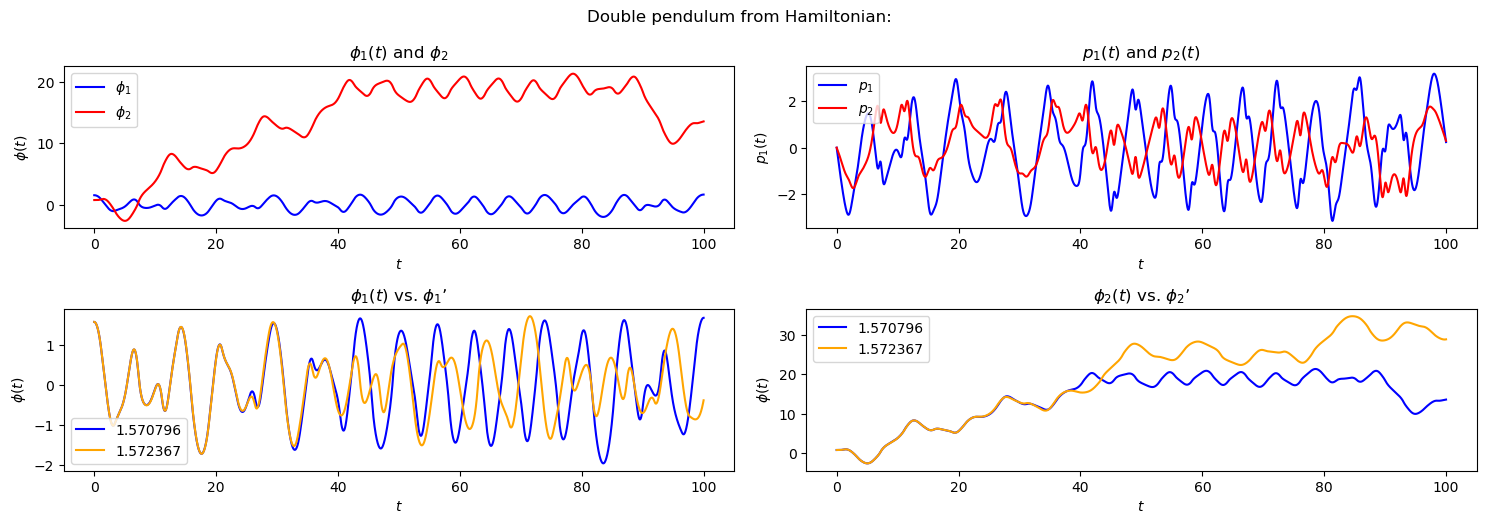

In [190]:
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
p_phi_vs_time_labels = (r'$t$', r'$p_1(t)$')
phi1_vs_phi_1_prime = r'$\phi_1(t)$ vs. $\phi_1\rq$'
phi2_vs_phi_2_prime = r'$\phi_2(t)$ vs. $\phi_2\rq$'

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Hamiltonian:  ' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi1 
ax_a = fig.add_subplot(2,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label='$\phi_1$', 
            title=r'$\phi_1(t)$ and $\phi_2$', 
            ax=ax_a)    
                              
# second plot: p1 
ax_b = fig.add_subplot(2,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p1[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='blue',
            label='$p_1$', 
            title=r'$p_1(t)$ and $p_2(t)$', 
            ax=ax_b)   
            
#overlay phi2 on phi 1
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label='$\phi_2$',  
            ax=ax_a)    

#overlay p2 on p1
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], p2[start : stop], 
            axis_labels=p_phi_vs_time_labels, 
            color='red',
            label='$p_2$',  
            ax=ax_b)    

#third plot: look for chaos, pendulums with slighly different initial conditions are overlayed here
ax_c = fig.add_subplot(2,2,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=round(phi1_0, 6), 
            title=r'$\phi_1(t)$', 
            ax=ax_c)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_prime[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='orange',
            label=round(phi1_0_prime, 6), 
            title=phi1_vs_phi_1_prime, 
            ax=ax_c)    

#fourth plot: same as plot 3 but for phi2

ax_d = fig.add_subplot(2,2,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=round(phi1_0, 6), 
            title=phi2_vs_phi_2_prime, 
            ax=ax_d)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2_prime[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='orange',
            label=round(phi1_0_prime, 6), 
            title=phi2_vs_phi_2_prime, 
            ax=ax_d)    
plt.tight_layout()

In the plots above $\phi_1$ represents the first pendulum and $\phi_2$ represents the pendulum hanging from $\phi_1$. $\phi_1$' and $\phi_2$' represent
the second system whos initial conditions are slightly off from the first.

We see in the plot of $\phi_1$ vs. $\phi_1'$ that the pendulums initial angle being off by .1% accuracy caused them to diverge substantially from the common motion a little bit after 40 seconds. Changing the variable "Accuracy" will modify the equations and plots to test for chaotic conditions for different levels of initial accuracy. If more than 6 decimal places are needed, the "label=" line of code will need to be altered. 

The plot for $\phi_2$ and $\phi_2$' are also shown.